## Setup

In [ ]:
import pandas as pd
import numpy as np
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv('/content/drive/MyDrive/practicum/good_list_rouge.csv', delimiter =  ",")
df.drop(columns = 'Unnamed: 0', inplace = True)

In [ ]:
df2 = pd.read_csv('/content/drive/MyDrive/practicum/BookList_Long (1).csv', delimiter =  "~")
df2.drop(columns = 'Unnamed: 0', inplace = True)

In [ ]:
df2

,title,full_text,summary,t5_sum
0,The Great Gatsby,\t\t\t The Great Gatsby \t\t\t\t by \t\t\t F. ...,"In spring 1922, Nick Carraway—a Yale alumnus f...",The Great Gatsby by F. Scott Fitzgerald The Ca...
1,Pride and Prejudice,THERE IS AN ILLUSTRATED EDITION OF THIS TITLE ...,"In the early 19th century, the Bennet family l...","""Netherfield Park is being let at last. Mr. Be..."
2,Heart of Darkness,Heart of Darkness by Joseph Conrad Contents I ...,Charles Marlow tells his friends the story of ...,"""The Nellie, a yawl, The river Thames flows th..."
3,The Trial,THE TRIAL Franz Kafka Translation Copyright © ...,"On the morning of his thirtieth birthday, Jose...","""Josef K. was arrested. Mrs. Grubach K. is und..."
4,The Sun Also Rises,ERNEST HEMINGWAY The Sun Also Rises CHARLES SC...,"On the surface, the novel is a love story betw...","""Robert Cohn was once a middleweight boxing ch..."
...,...,...,...,...
101,The Song of Roland,The Song of Roland Translated by C. K. [Charle...,"From a historical perspective, the Song of Rol...",The Song of Roland Translated by C. K. Moncrei...
102,Lady into Fox,"Mary Ann Fink, and the Project Gutenberg Onlin...","Silvia Tebrick, the 24-year-old wife of Richar...",Mrs. Tebrick was changed into a fox Silvia Fox...
103,Maggie: A Girl of the Streets,MAGGIE: A GIRL OF THE STREETS BY STEPHEN CRANE...,"The story opens with Jimmie, at this point a y...",A fight broke out between children from Devil'...
104,The History of Mr. Polly,The History of Mr. Polly by H. G. Wells Chapte...,The protagonist of The History of Mr. Polly is...,Mr. Polly was sitting on a stile between two t...


In [ ]:
df2["book_wordcount"]= df2["full_text"].map(lambda x: len(x.split(" ")))
df2["sum_wordcount"]= df2["summary"].map(lambda x: len(x.split(" ")))
df2.describe()

,book_wordcount,sum_wordcount
count,106.000000,106.000000
mean,76788.726415,683.792453
std,46588.419633,380.827613
min,7065.000000,111.000000
25%,38306.750000,435.000000
50%,69577.500000,673.000000
75%,103936.000000,868.000000
max,198255.000000,2896.000000


In [ ]:
df2 = df2[["title","full_text"]]

In [ ]:
df_merged = pd.merge(df, df2, on='title')

In [ ]:
df_merged

,title,summary,bart_large_xsum_samsum,rouge1,rouge2,rougeL,full_text
0,The Great Gatsby,"In spring 1922, Nick Carraway—a Yale alumnus f...",The Great Gatsby by F. Scott Fitzgerald The Ca...,0.478168,0.116129,0.190408,\t\t\t The Great Gatsby \t\t\t\t by \t\t\t F. ...
1,Pride and Prejudice,"In the early 19th century, the Bennet family l...","""Netherfield Park is being let at last. Mr. Be...",0.455454,0.125833,0.183181,THERE IS AN ILLUSTRATED EDITION OF THIS TITLE ...
2,Heart of Darkness,Charles Marlow tells his friends the story of ...,"""The Nellie, a yawl, The river Thames flows th...",0.453889,0.107631,0.203689,Heart of Darkness by Joseph Conrad Contents I ...
3,The Trial,"On the morning of his thirtieth birthday, Jose...","""Josef K. was arrested. Mrs. Grubach K. is und...",0.423328,0.095622,0.170940,THE TRIAL Franz Kafka Translation Copyright © ...
4,The Sun Also Rises,"On the surface, the novel is a love story betw...","""Robert Cohn was once a middleweight boxing ch...",0.363855,0.089264,0.163855,ERNEST HEMINGWAY The Sun Also Rises CHARLES SC...
...,...,...,...,...,...,...,...
95,The Song of Roland,"From a historical perspective, the Song of Rol...",The Song of Roland Translated by C. K. Moncrei...,0.392559,0.071933,0.162925,The Song of Roland Translated by C. K. [Charle...
96,Lady into Fox,"Silvia Tebrick, the 24-year-old wife of Richar...",Mrs. Tebrick was changed into a fox Silvia Fox...,0.279749,0.046122,0.150313,"Mary Ann Fink, and the Project Gutenberg Onlin..."
97,Maggie: A Girl of the Streets,"The story opens with Jimmie, at this point a y...",A fight broke out between children from Devil'...,0.471545,0.111413,0.214092,MAGGIE: A GIRL OF THE STREETS BY STEPHEN CRANE...
98,The History of Mr. Polly,The protagonist of The History of Mr. Polly is...,Mr. Polly was sitting on a stile between two t...,0.225090,0.054559,0.114695,The History of Mr. Polly by H. G. Wells Chapte...


## Analysis

In [ ]:
df_merged["book_wordcount"]= df_merged["full_text"].map(lambda x: len(x.split(" ")))
df_merged["sum_wordcount"]= df_merged["summary"].map(lambda x: len(x.split(" ")))
df_merged["gensum_wordcount"]= df_merged["bart_large_xsum_samsum"].map(lambda x: len(x.split(" ")))

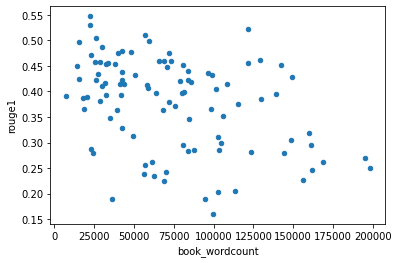

In [ ]:
import matplotlib.pyplot as plt
df_merged.plot(x ='book_wordcount', y='rouge1', kind = 'scatter')

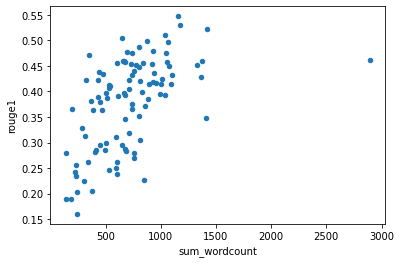

In [ ]:
import matplotlib.pyplot as plt
df_merged.plot(x ='sum_wordcount', y='rouge1', kind = 'scatter')

In [ ]:
df_merged.describe()

,rouge1,rouge2,rougeL,book_wordcount,sum_wordcount,gensum_wordcount
count,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000
mean,0.376760,0.091091,0.162166,73020.878788,689.777778,1230.030303
std,0.090029,0.028079,0.027201,44679.372733,302.835901,784.088987
min,0.160297,0.011204,0.095541,7065.000000,138.000000,214.000000
25%,0.297396,0.071606,0.140513,35286.500000,456.500000,622.000000
50%,0.396877,0.092486,0.166269,67898.000000,677.000000,1083.000000
75%,0.448128,0.106955,0.180286,100450.000000,877.500000,1548.000000
max,0.546993,0.198221,0.236041,198255.000000,1415.000000,4741.000000


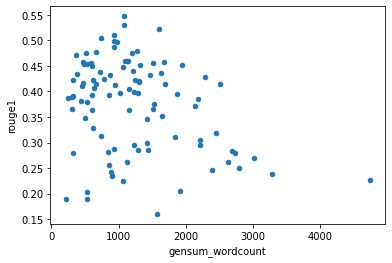

In [ ]:
df_merged.plot(x ='gensum_wordcount', y='rouge1', kind = 'scatter')

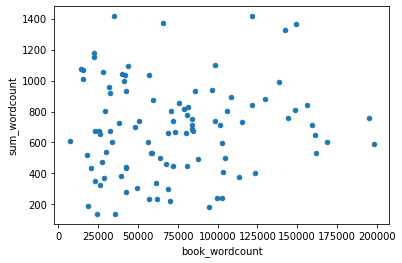

In [ ]:
df_merged.plot(x ='book_wordcount', y='sum_wordcount', kind = 'scatter')

In [ ]:
import seaborn as sn

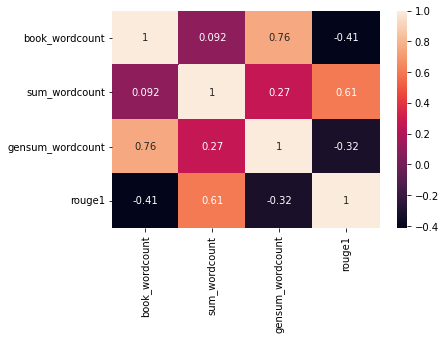

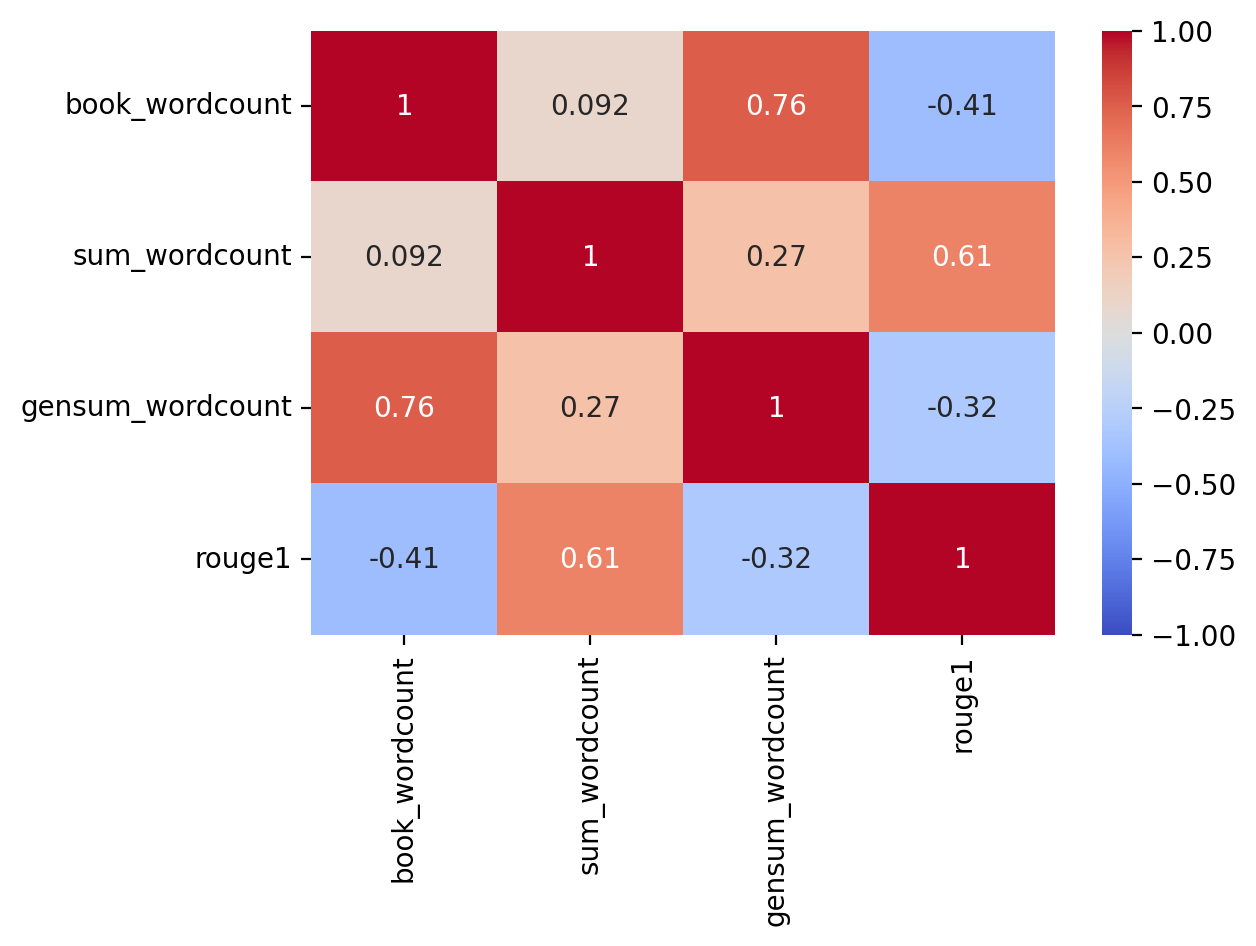

In [ ]:
corrMatrix = df_merged[["book_wordcount",'sum_wordcount','gensum_wordcount',"rouge1"]].corr()
sn.heatmap(corrMatrix, annot=True)
plt.figure(dpi = 200) 
sn.heatmap(corrMatrix, annot=True, cmap= 'coolwarm', vmin=-1, vmax=1)

In [ ]:
df_merged["rougemean"]= (df_merged["rouge1"] + df_merged["rouge2"] + df_merged["rougeL"]) /3

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


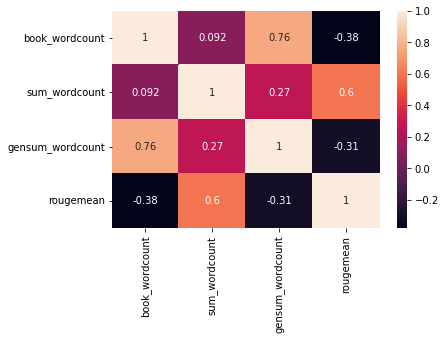

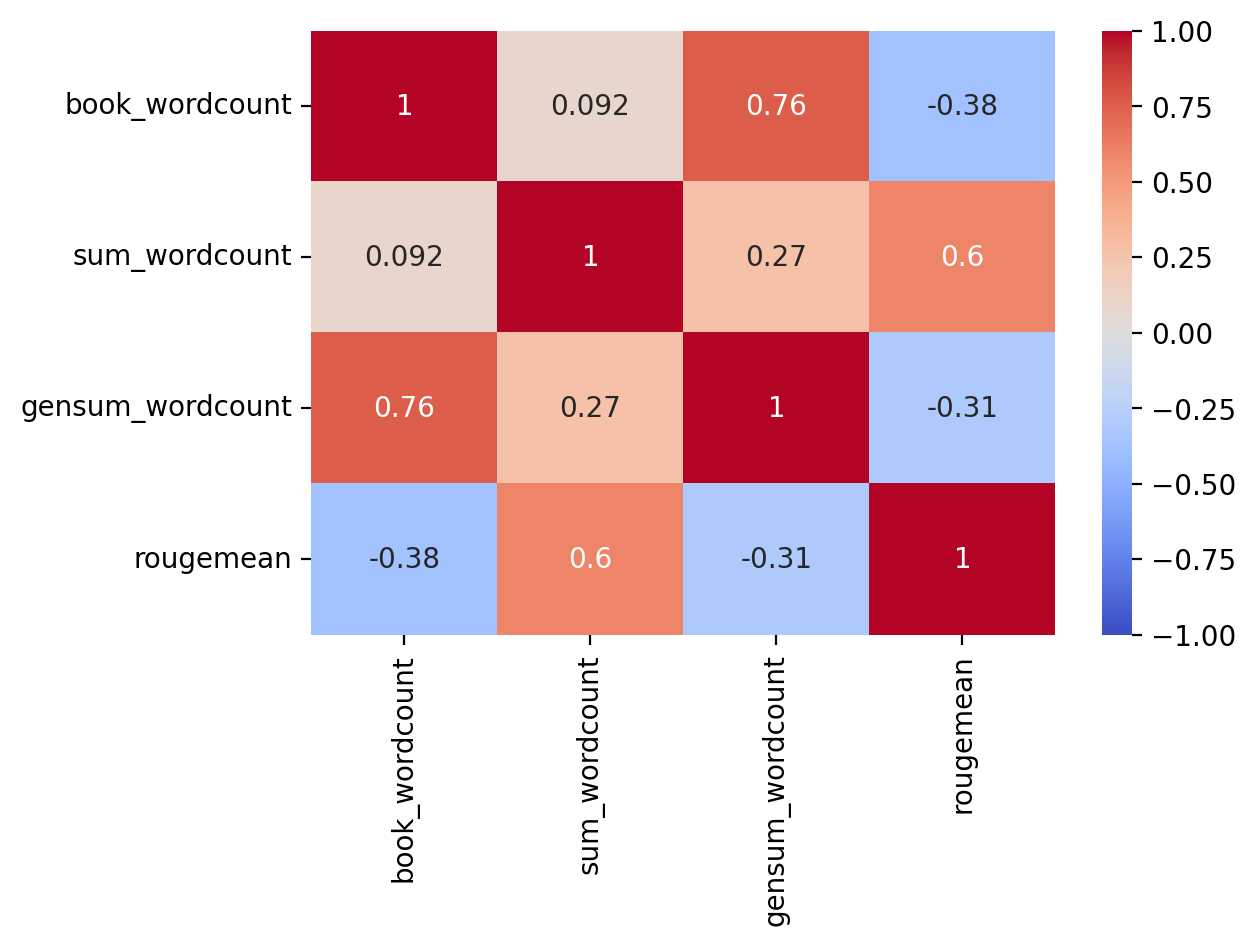

In [ ]:
corrMatrix = df_merged[["book_wordcount",'sum_wordcount','gensum_wordcount',"rougemean"]].corr()
sn.heatmap(corrMatrix, annot=True)
plt.figure(dpi = 200) 
sn.heatmap(corrMatrix, annot=True, cmap= 'coolwarm', vmin=-1, vmax=1)

In [ ]:
df_merged["length_ratio"] = df_merged["sum_wordcount"]/df_merged["gensum_wordcount"]

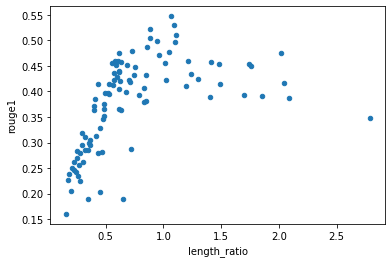

In [ ]:
df_merged.plot(x ="length_ratio", y="rouge1", kind = 'scatter')

In [ ]:
df_merged[["length_ratio","rouge1"]].corr()

,length_ratio,rouge1
length_ratio,1.000000,0.531359
rouge1,0.531359,1.000000
